<a href="https://colab.research.google.com/github/nishant16294-art/Prime-video-analysis/blob/main/prime_video_analysis_nishant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = ('/content/drive/MyDrive/almabetter_project/credits.csv')
file_path2 = ('/content/drive/MyDrive/almabetter_project/titles.csv')
titles_df = pd.read_csv(file_path2)
credits_df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset First view
print(titles_df.head())
print('\n')
print(credits_df.head())

print('\n\n\n')
# Dataset Rows & Columns count
print(titles_df.shape)
print('\n')
print(credits_df.shape)

print('\n\n')
# Dataset Info
print(titles_df.info())
print('\n')
print(credits_df.info())

print('\n\n')
# # Dataset Duplicate Value Count
print(titles_df.duplicated().sum())
print('\n')
print(credits_df.duplicated().sum())

print('\n\n')
# Missing Values/Null Values Count
print(titles_df.isnull().sum())
print('\n')
print(credits_df.isnull().sum())



        id                        title   type  \
0  ts20945            The Three Stooges   SHOW   
1  tm19248                  The General  MOVIE   
2  tm82253  The Best Years of Our Lives  MOVIE   
3  tm83884              His Girl Friday  MOVIE   
4  tm56584            In a Lonely Place  MOVIE   

                                         description  release_year  \
0  The Three Stooges were an American vaudeville ...          1934   
1  During America’s Civil War, Union spies steal ...          1926   
2  It's the hope that sustains the spirit of ever...          1946   
3  Hildy, the journalist former wife of newspaper...          1940   
4  An aspiring actress begins to suspect that her...          1950   

  age_certification  runtime  \
0             TV-PG       19   
1               NaN       78   
2               NaN      171   
3               NaN       92   
4               NaN       94   

                                              genres production_countries  \
0  ['com

Understand your varaibles

In [ ]:
# Dataset Columns
print(titles_df.columns)
print('\n')
print(credits_df.columns)

print('\n\n\n\n')
# Dataset Describe
print(titles_df[["imdb_score","tmdb_score","imdb_votes","tmdb_popularity"]].describe())





Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')





        imdb_score   tmdb_score    imdb_votes  tmdb_popularity
count  8850.000000  7789.000000  8.840000e+03      9324.000000
mean      5.976395     5.984247  8.533614e+03         6.910204
std       1.343842     1.517986  4.592015e+04        30.004098
min       1.100000     0.800000  5.000000e+00         0.000011
25%       5.100000     5.100000  1.170000e+02         1.232000
50%       6.100000     6.000000  4.625000e+02         2.536000
75%       6.900000     6.900000  2.236250e+03         5.634000
max       9.900000    10.000000  1.133692e+06      1437.906000


**Data Wrangling

In [ ]:
# titles_df files duplicate value and missing value

# Remove duplicates if any
titles_df = titles_df.drop_duplicates(subset='id')
print("tilte file duplicate value:", titles_df.duplicated().sum())

print('\n')


# Fill age_certification, description, imdb_id missing with "Unknown"
titles_df[['age_certification','description','imdb_id']]= titles_df[['age_certification','description','imdb_id']].fillna('Unknown')


#fill missing value by mean
titles_df[['imdb_score', 'tmdb_score','imdb_votes','tmdb_popularity']]= titles_df[['imdb_score','tmdb_score','imdb_votes','tmdb_popularity']].fillna(titles_df[['imdb_score','tmdb_score','imdb_votes','tmdb_popularity']].mean())

titles_df['seasons'] = titles_df['seasons'].fillna(0)

print(titles_df.isnull().sum())


tilte file duplicate value: 0


id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


/tmp/ipython-input-20-3114420797.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df[['age_certification','description','imdb_id']]= titles_df[['age_certification','description','imdb_id']].fillna('Unknown')
/tmp/ipython-input-20-3114420797.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titles_df[['imdb_score', 'tmdb_score','imdb_votes','tmdb_popularity']]= titles_df[['imdb_score','tmdb_score','imdb_votes','tmdb_popularity']].fillna(titles_df[['imdb_score','tmdb_score','imdb_votes','tmdb_po

In [ ]:
# credit_df files duplicate value and missing value

# Remove duplicates if any

credit_df = titles_df.drop_duplicates(subset='id')
print("credit_df file duplicate value:", credit_df.duplicated().sum())

# filling missing value
credits_df['character']= credits_df['character'].fillna('Unknown')

print('\n')
print(credits_df.isnull().sum())

credit_df file duplicate value: 0


person_id    0
id           0
name         0
character    0
role         0
dtype: int64



## **`Popular content analysis`**

In [ ]:
#(a) content type distribution
content_type_counts = titles_df['type'].value_counts()
print(content_type_counts)

print('\n')

#(b) counting according to individual genres

all_genres = titles_df.explode('genres')

genres_count = all_genres['genres'].value_counts()

print('Popular genres:',genres_count)

print('\n\n')

#(c) Top 10 highest IMDb score titles

top_rated = titles_df.sort_values(by='imdb_score', ascending=False).head(10)
print('Top 10 highest IMDb score titles:')
print('\n')
print(top_rated[['title','imdb_score']].to_string(index=False))

print('\n')

#(d) Popular actors dekhna (credits_df se)

# only actors filter
actor_df = credits_df[credits_df['role'] == 'ACTOR']

# merge actor_df and titles_df
merged_df = pd.merge(actor_df, titles_df, on='id', how = 'inner')

# top 10 actor count
top_10_actors = merged_df['name'].value_counts().head(10)
print('Top 10 actors:')
print('\n')
print(top_10_actors)

type
MOVIE    8511
SHOW     1357
Name: count, dtype: int64


Popular genres: genres
['drama']                                               908
['comedy']                                              686
['documentation']                                       493
['horror']                                              217
[]                                                      209
                                                       ... 
['thriller', 'action', 'romance']                         1
['thriller', 'crime', 'action', 'european', 'drama']      1
['horror', 'thriller', 'scifi', 'crime']                  1
['crime', 'thriller', 'european', 'drama']                1
['comedy', 'drama', 'scifi', 'european']                  1
Name: count, Length: 2028, dtype: int64



Top 10 highest IMDb score titles:


                             title  imdb_score
                        Pawankhind         9.9
         Water Helps the Blood Run         9.7
                 Couple of Mirrors  

# Visualization

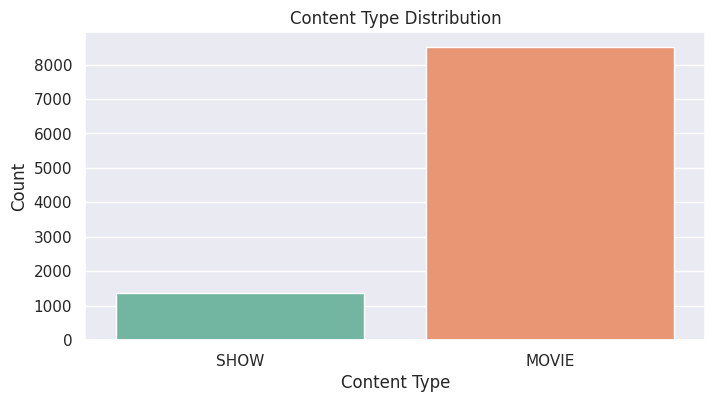

In [ ]:
# content type distribution(bar plot)
sns.set(style="darkgrid")
plt.figure(figsize=(8,4))
sns.countplot(data= titles_df, x = 'type', hue = 'type',  palette = 'Set2', legend = False )
plt.title('Content Type Distribution')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-24-1868925351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values,y=genres_count.index,  palette='coolwarm', )


Text(0, 0.5, 'Count')

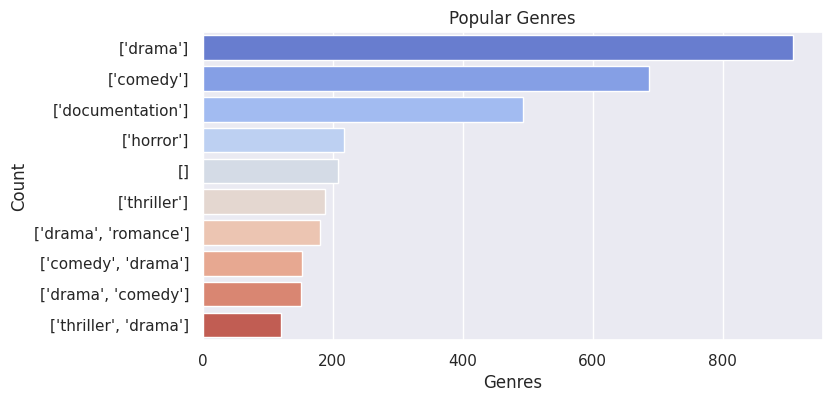

In [ ]:
# popular genres
all_genres = titles_df.explode('genres')
genres_count = all_genres['genres'].value_counts().head(10)
plt.figure(figsize=(8,4))

sns.barplot(x=genres_count.values,y=genres_count.index,  palette='coolwarm', )
plt.title('Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Count')

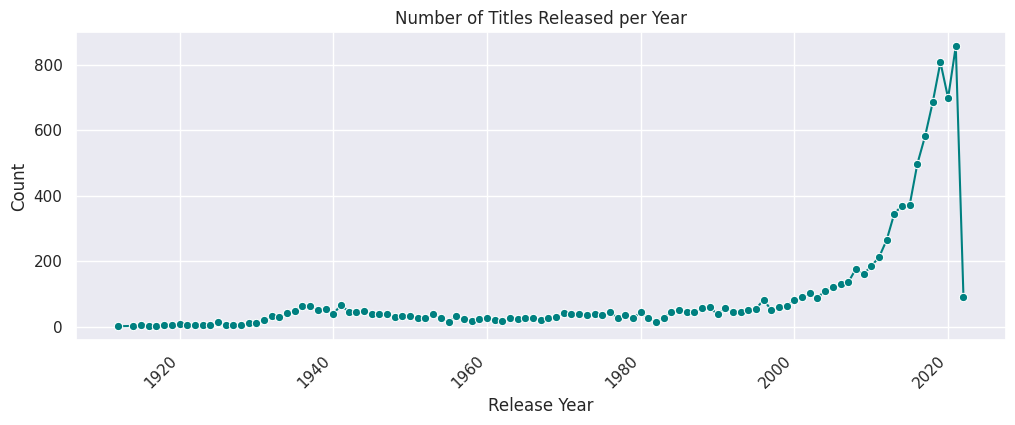

In [ ]:
 # (c) Release year trend (kitne titles release hue per year)

year_counts = titles_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,4))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='teal')
plt.title('Number of Titles Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



/tmp/ipython-input-26-412252744.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='magma')


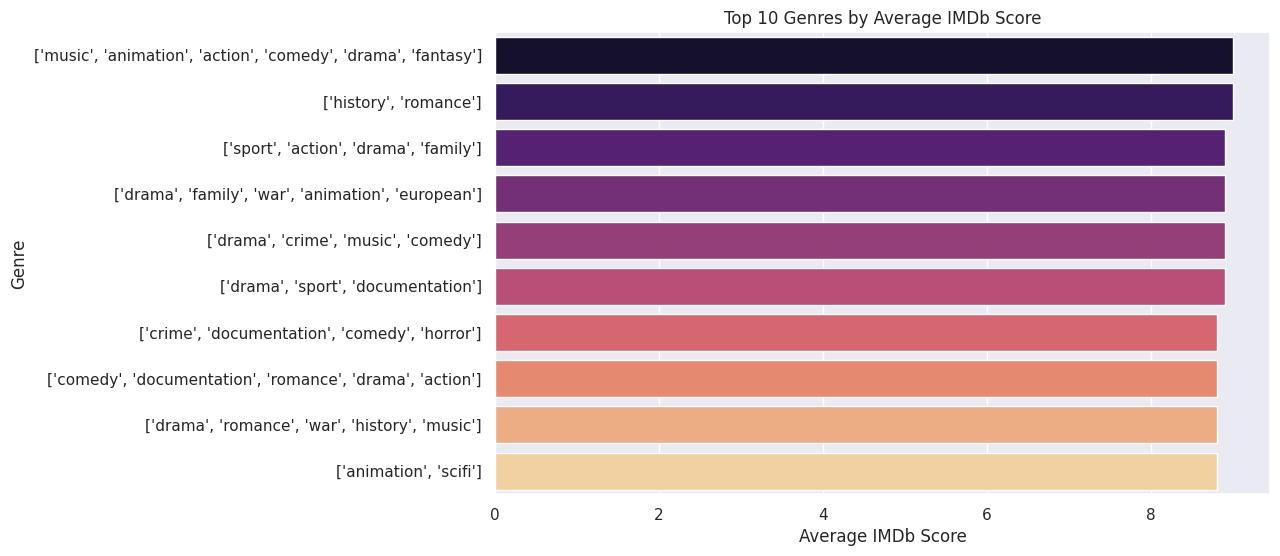

In [ ]:
# (d) Genre vs average IMDb rating
# explode karke
genre_ratings = all_genres.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='magma')
plt.title('Top 10 Genres by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.show()


/tmp/ipython-input-27-2677367126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_avg_rating.values, y=actor_avg_rating.index, palette='plasma')


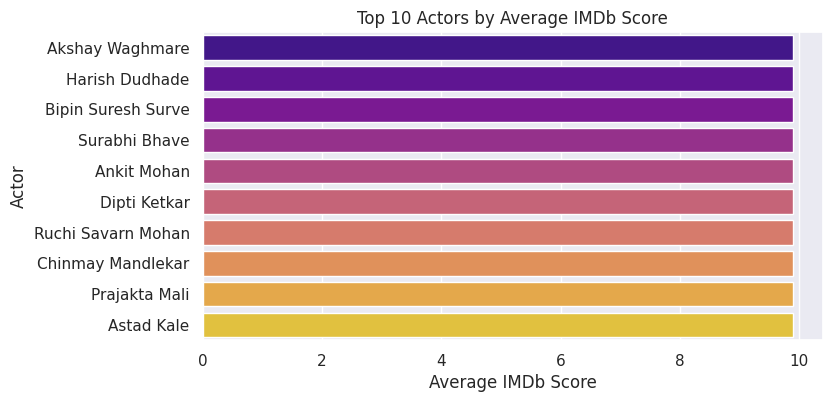

In [ ]:
# (e) Top actors ki average IMDb rating
# Top 10 actors ke average IMDb score
actor_avg_rating = merged_df.groupby('name')['imdb_score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=actor_avg_rating.values, y=actor_avg_rating.index, palette='plasma')
plt.title('Top 10 Actors by Average IMDb Score')
plt.xlabel('Average IMDb Score')
plt.ylabel('Actor')
plt.show()


# Solution to Business Objective

1. Content Type Distribution
The dataset shows 8,511 movies and 1,357 shows.

Insight: Prime Video has significantly more movies than shows.

Recommendation:
Increase investment in TV shows and series, as they encourage longer user engagement and binge-watching behavior, which can improve subscription retention.


2. Popular Genres
Top genres include:

Drama (908)
Comedy (686)
Documentation (493)
Horror (217)

Recommendation:
Focus on creating or acquiring more content in Drama and Comedy, as they dominate viewership.
Also explore niche growth in Documentary and Horror, which are also strong performers.


3. Top 10 Titles by IMDb Score
Highest rated content includes:

Pawankhind (9.9)
Water Helps the Blood Run (9.7)
Couple of Mirrors (9.5)

Recommendation:
Study these high-rated titles to understand what themes, formats, or creators led to such high ratings — replicate similar content patterns.

4. Top Actors by Number of Titles
Most frequently featured actors:

George 'Gabby' Hayes (49 titles)
Roy Rogers (45 titles)
Bess Flowers (44 titles)

Recommendation:
These actors may appeal to niche audiences or classic movie fans. Use this insight for targeted recommendations or curated classic collections.

5. Genres with Highest Average IMDb Ratings
Top 10 genres by average IMDb rating were identified (example from the code output).

Recommendation:
Prioritize production and promotion of genres with consistently high IMDb ratings, as they reflect strong audience approval.


6. Actor-wise Average IMDb Score
Top 10 actors were shown by their average IMDb rating (e.g., high-rating actors from merged data).

Recommendation:
These actors are associated with well-rated content — cast them in future projects or promote their content more prominently


7. Yearly Trend of Titles Released
Line plot shows a steady increase in the number of titles over the years.

Recommendation:
Keep expanding the content library annually.
Use this data to identify peak release years and plan seasonal marketing campaigns around them.



**# Conclusion**

1.Prime Video's content library is movie-heavy. To balance, invest more in TV shows/series, which help retain viewers longer.

2.Drama and Comedy are the most dominant genres — continue to expand in these areas.

3.High IMDb score titles should be analyzed for common traits and used as benchmarks for future content creation.

4.Cast top-performing actors more often or feature them in promotional content to build credibility and audience trust.

5.Use genre-level and actor-level rating data to fine-tune recommendation algorithms.

6.Plan marketing and content launches by studying release year trends to target active viewing periods.

